----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [6]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Cargar datos

In [7]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [8]:
print(calls.info())
print(calls.head())

print(internet.info())
print(internet.head())

print(messages.info())
print(messages.head())

print(plans.info())
print(plans.head())

print(users.info())
print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-nul

## Tarifas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info

<bound method DataFrame.info of    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  >

In [10]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [11]:
#La información general del dataset muestra que los tipos de datos son adecuados, no se observan valores ausentes en la muestra y los valores numéricos son consistentes con las características de los planes. No se aprecian errores evidentes, aunque sería conveniente convertir los MB a GB para facilitar el análisis

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [13]:
calls['duration'] = np.ceil(calls['duration'])

In [14]:
#Las fechas fueron corregidas con pd.to_datatime
#se redondeo la duración de la llmada para cobrar el minuto entero, no importa si es 2.1, se redondea arriba

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [16]:
#internet['gb_used'] = internet['mb_used'] / 1024


In [17]:
#Se convirtio de MB a GB y se redondeo para calcular el consumo

## Usuarios/as

In [18]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [19]:
# Imprime una muestra de datos para usuarios
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [20]:
#La tabla muestra unicamente dos registros, para el plan Surf y Ultimate, los valores estan completos y no hay valores ausentes, no se observan errores evidentes

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
users['churned'] = users['churn_date'].notna().astype(int)

In [22]:
#Se creó una nueva columna llamada churned que marca con 1 a los usuarios que tienen fecha de baja y con 0 a los que no, permitiendo identificar fácilmente quién abandonó el servicio.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
users['reg_month'] = users['reg_date'].dt.month

In [24]:
#Se añadió la columna reg_month, extrayendo el mes de la fecha de registro para facilitar análisis

## Llamadas

In [25]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


In [26]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [27]:
#El dataset no presenta valores ausentes, los datos son correctos, no se observan errores evidentes o que se requiera corrección de los datos

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [28]:
calls['call_day_of_week'] = calls['call_date'].dt.day_name()

In [29]:
#Se añadió una nueva columna que extrae el día de la semana de cada llamada

## Mensajes

In [30]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


In [31]:
# Imprime una muestra de datos para los mensajes
messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [32]:
#El dataset esta bien estructurado, no hay valores nulos y tienen el tipo de dato correcto, no hay necesidad de correcciones adicionales

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [33]:
messages['weekday'] = messages['message_date'].dt.day_name()

In [34]:
#Se creó una nueva columna que indica el día de la semana de cada mensaje, así se facilita el análisis por día

## Internet

In [35]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


In [36]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [37]:
#No se muestran valores ausentes y los tipos de datos son adecuados

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [38]:
internet['month'] = internet['session_date'].dt.month

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [39]:
internet['weekday'] = internet['session_date'].dt.day_name()
internet['is_weekend'] = internet['session_date'].dt.weekday >= 5


In [40]:
#Se indica en día de la semana y si es fin de semana o no, para idenntificar patrones de habitos

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [41]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.info()
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [42]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = (
    calls
    .groupby(['user_id', 'month'])
    .agg(
        calls_count = ('id', 'count')
    )
    .reset_index()
)

print(calls_per_user_month.head())

   user_id  month  calls_count
0     1000     12           16
1     1001      8           27
2     1001      9           49
3     1001     10           65
4     1001     11           64


In [43]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = (
    calls
    .groupby(['user_id', 'month'])
    .agg(
        minutes_used = ('duration', 'sum')
    )
    .reset_index()
)

print(minutes_per_user_month.head())

   user_id  month  minutes_used
0     1000     12         124.0
1     1001      8         182.0
2     1001      9         315.0
3     1001     10         393.0
4     1001     11         426.0


In [44]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_month = (
    messages
    .groupby(['user_id', 'month'])
    .agg(
        messages_count=('id', 'count')
    )
    .reset_index()
)

print(messages_per_user_month.head())

   user_id  month  messages_count
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36


In [45]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_user_month = (
    internet
    .groupby(['user_id', 'month'])
    .agg(
        mb_used_total=('mb_used', 'sum')
    )
    .reset_index()
)
internet_per_user_month['gb_used_total'] = internet_per_user_month['mb_used_total'] / 1024

internet_per_user_month['gb_used_total'] = np.ceil(internet_per_user_month['gb_used_total'])
print(internet_per_user_month.head())

   user_id  month  mb_used_total  gb_used_total
0     1000     12        1901.47            2.0
1     1001      8        6919.15            7.0
2     1001      9       13314.82           14.0
3     1001     10       22330.49           22.0
4     1001     11       18504.30           19.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]


In [46]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_month_data = calls_per_user_month.copy()

user_month_data = user_month_data.merge(
    minutes_per_user_month,
    on=['user_id', 'month'],
    how='outer'
)

user_month_data = user_month_data.merge(
    messages_per_user_month,
    on=['user_id', 'month'],
    how='outer'
)

user_month_data = user_month_data.merge(
    internet_per_user_month,
    on=['user_id', 'month'],
    how='outer'
)
user_month_data = user_month_data.fillna(0)

print(user_month_data.head())

   user_id  month  calls_count  minutes_used  messages_count  mb_used_total  \
0     1000     12         16.0         124.0            11.0        1901.47   
1     1001      8         27.0         182.0            30.0        6919.15   
2     1001      9         49.0         315.0            44.0       13314.82   
3     1001     10         65.0         393.0            53.0       22330.49   
4     1001     11         64.0         426.0            36.0       18504.30   

   gb_used_total  
0            2.0  
1            7.0  
2           14.0  
3           22.0  
4           19.0  


In [47]:
# Añade la información de la tarifa
user_month_data = user_month_data.merge(
    users[['user_id', 'plan']],
    on='user_id',
    how='left'
)
user_month_data = user_month_data.merge(
    plans[['plan_name',
           'messages_included', 'mb_per_month_included',
           'minutes_included', 'usd_monthly_pay',
           'usd_per_gb', 'usd_per_message', 'usd_per_minute']],
    left_on='plan',
    right_on='plan_name',
    how='left'
)
print(user_month_data.head())

   user_id  month  calls_count  minutes_used  messages_count  mb_used_total  \
0     1000     12         16.0         124.0            11.0        1901.47   
1     1001      8         27.0         182.0            30.0        6919.15   
2     1001      9         49.0         315.0            44.0       13314.82   
3     1001     10         65.0         393.0            53.0       22330.49   
4     1001     11         64.0         426.0            36.0       18504.30   

   gb_used_total      plan plan_name  messages_included  \
0            2.0  ultimate  ultimate               1000   
1            7.0      surf      surf                 50   
2           14.0      surf      surf                 50   
3           22.0      surf      surf                 50   
4           19.0      surf      surf                 50   

   mb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                  30720              3000               70           7   
1                  1

In [48]:
#El Dataframe muestra el consumo mensual por usuario junto con los detalles de su plan. Se observa que los usuarios del plan ultimate tienen limites mucho más altos, mientras que en el plan surf tienen menos beneficios y se paga menos, pero consumen más de lo que el plan les permite, esto podría verse reflejado en el pago total

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [49]:
df = user_month_data.copy()

df['gb_included'] = df['mb_per_month_included'] / 1024

df['excess_minutes'] = np.maximum(0, df['minutes_used'] - df['minutes_included'])
df['excess_messages'] = np.maximum(0, df['messages_count'] - df['messages_included'])
df['excess_gb'] = np.maximum(0, df['gb_used_total'] - df['gb_included'])

df['cost_minutes'] = df['excess_minutes'] * df['usd_per_minute']
df['cost_messages'] = df['excess_messages'] * df['usd_per_message']
df['cost_gb'] = df['excess_gb'] * df['usd_per_gb']

df['total'] = (
    df['usd_monthly_pay'] +
    df['cost_minutes'] +
    df['cost_messages'] +
    df['cost_gb']
)

print(df[['user_id', 'month', 'total']].head())

   user_id  month  total
0     1000     12  70.00
1     1001      8  20.00
2     1001      9  20.00
3     1001     10  90.09
4     1001     11  60.00


In [50]:

df['total'] = (
    df['usd_monthly_pay'] +
    df['cost_minutes'] +
    df['cost_messages'] +
    df['cost_gb']
)
print(df)


      user_id  month  calls_count  minutes_used  messages_count  \
0        1000     12         16.0         124.0            11.0   
1        1001      8         27.0         182.0            30.0   
2        1001      9         49.0         315.0            44.0   
3        1001     10         65.0         393.0            53.0   
4        1001     11         64.0         426.0            36.0   
...       ...    ...          ...           ...             ...   
2288     1349     12          0.0           0.0            61.0   
2289     1361      5          0.0           0.0             2.0   
2290     1482     10          0.0           0.0             2.0   
2291     1108     12          0.0           0.0             0.0   
2292     1311      6          0.0           0.0             0.0   

      mb_used_total  gb_used_total      plan plan_name  messages_included  \
0           1901.47            2.0  ultimate  ultimate               1000   
1           6919.15            7.0      s

In [51]:
#El DataFrame muestra los ingresos mensuales por usuario. Se observa que los ingresos varían significativamente entre meses y usuarios, reflejando tanto el pago base del plan como el consumo extra de servicios. Algunos usuarios generan ingresos muy superiores al mínimo del plan, indicando un uso elevado de minutos, mensajes o datos más allá de los límites incluidos, el plan ultimate es una mejor opción para consumidores muy exigentes

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

        plan  month  minutes_used
0       surf      1    203.000000
1       surf      2    297.000000
2       surf      3    330.000000
3       surf      4    351.540000
4       surf      5    399.584416
5       surf      6    431.298969
6       surf      7    449.983471
7       surf      8    410.111111
8       surf      9    414.226804
9       surf     10    429.729958
10      surf     11    423.325088
11      surf     12    473.836478
12  ultimate      1    193.500000
13  ultimate      2    403.142857
14  ultimate      3    304.250000
15  ultimate      4    336.857143
16  ultimate      5    406.241379
17  ultimate      6    370.957447
18  ultimate      7    427.067797
19  ultimate      8    421.436620
20  ultimate      9    437.511628
21  ultimate     10    450.735849
22  ultimate     11    445.196850
23  ultimate     12    459.099338


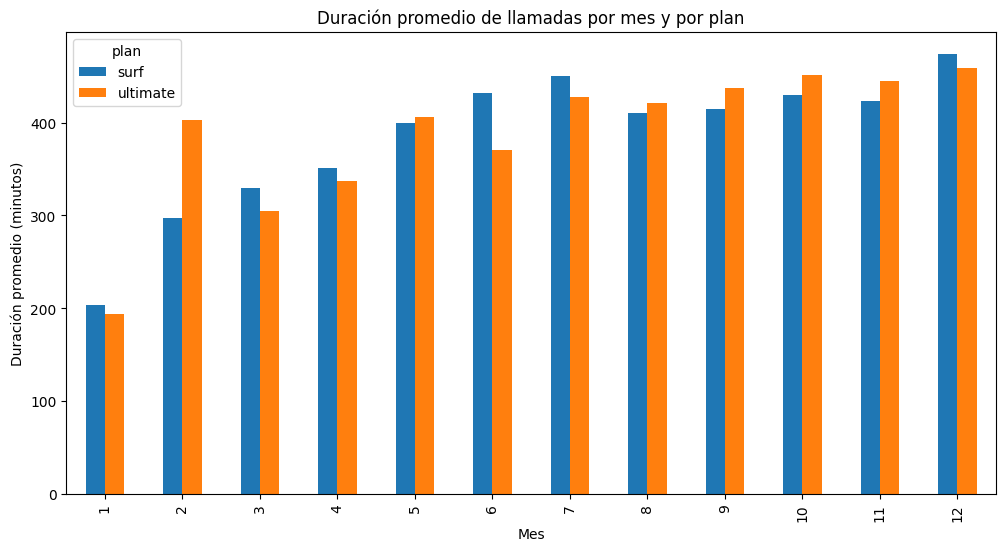

In [52]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_duration = df.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

print(calls_duration)
pivot_table = calls_duration.pivot(index='month', columns='plan', values='minutes_used')
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title("Duración promedio de llamadas por mes y por plan")
plt.xlabel("Mes")
plt.ylabel("Duración promedio (minutos)")
plt.show()

In [53]:
#Se observa la duración promedio de llamadas de los usuarios mes a mes, diferenciada por plan (Surf vs. Ultimate). Los usuarios del plan Surf tienden a tener picos más altos de duración promedio en algunos meses, mientras que los del plan Ultimate tienen un consumo más estable. Hay un patrón ascendente hacia finales de año, lo que puede indicar un mayor uso de llamadas en ciertos meses

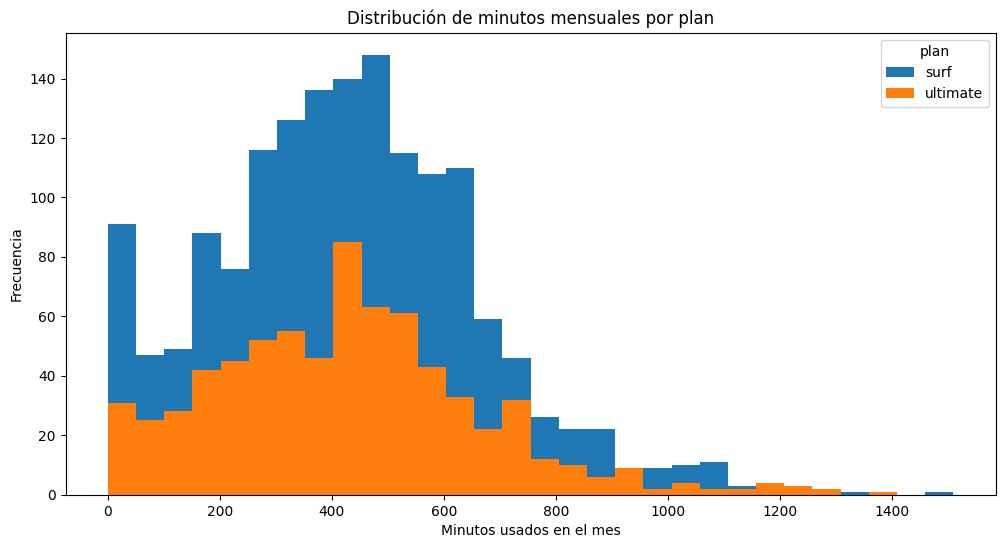

In [54]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df.pivot(columns='plan', values='minutes_used').plot.hist(
    bins=30,
    figsize=(12,6),
    title="Distribución de minutos mensuales por plan"
)

plt.xlabel("Minutos usados en el mes")
plt.ylabel("Frecuencia")
plt.show()

In [55]:
#El histograma muestra cómo se distribuyen los minutos usados por mes para cada plan. El plan Surf tiene una distribución más dispersa y concentrada en valores bajos a medios, con algunos usuarios que exceden ampliamente los minutos incluidos. El plan Ultimate tiene una distribución más centrada y con menos usuarios en rangos extremos, reflejando que este plan ofrece mayor capacidad y su base de usuarios tiende a no exceder tanto los límites. Esto indica que Surf tiene usuarios con consumos muy variados, mientras que Ultimate atrae a usuarios de consumo más consistente.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [56]:
# Calcula la media y la varianza de la duración mensual de llamadas.
variance = np.var(df['minutes_used'])
mean_minutes = np.mean(df['minutes_used'])

print(f"Media de minutos usados: {mean_minutes:.2f}")
print(f"Varianza de minutos usados: {variance:.2f}")

Media de minutos usados: 429.28
Varianza de minutos usados: 55822.82


In [57]:
#los usuarios consumen aproximadamente 436 minutos al mes, con una varianza de 53.78, hay una gran dispersión

<Figure size 1000x600 with 0 Axes>

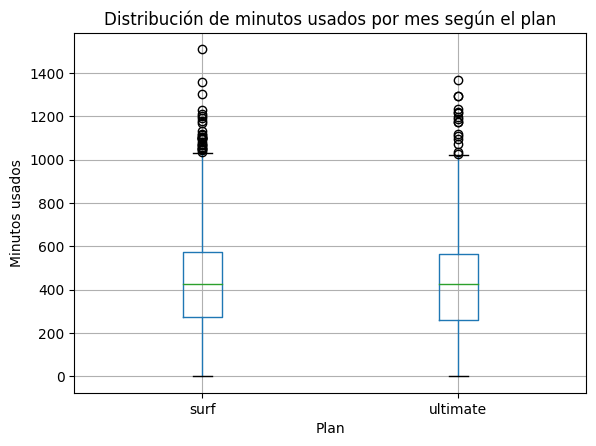

In [58]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
df.boxplot(column='minutes_used', by='plan')
plt.title('Distribución de minutos usados por mes según el plan')
plt.suptitle('') 
plt.xlabel('Plan')
plt.ylabel('Minutos usados')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

In [59]:
#La grafica muestra la distribución de minutos usados es muy similar para ambos planes, con una media al rededor de 420, ambos tienen valores atipicos, con un consumo de mas de 1000 minutos, pero los valores más altos están en los usuarios del plan surf

### Mensajes

In [60]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_total = (
    df.groupby(['plan', 'month'])['messages_count']
      .mean()
      .reset_index()
)
print(messages_total.head(20))

        plan  month  messages_count
0       surf      1       10.500000
1       surf      2       12.000000
2       surf      3       15.260870
3       surf      4       17.400000
4       surf      5       24.012987
5       surf      6       25.298969
6       surf      7       27.033058
7       surf      8       28.777778
8       surf      9       30.762887
9       surf     10       33.839662
10      surf     11       32.385159
11      surf     12       38.600629
12  ultimate      1       15.500000
13  ultimate      2       21.571429
14  ultimate      3       20.250000
15  ultimate      4       22.047619
16  ultimate      5       32.103448
17  ultimate      6       29.340426
18  ultimate      7       32.830508
19  ultimate      8       38.478873


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

In [61]:
#Se puede concluir que el promedio de mensajes de ambos planes es similar, pero en muchas ocasiones los usuarios del plan ultimete no superan el limite, por lo que no deben pagar de más

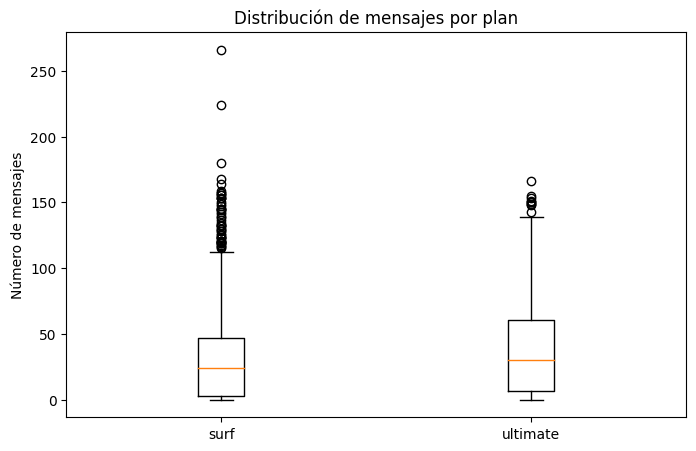

In [62]:
data = [
    df[df['plan'] == 'surf']['messages_count'].dropna(),
    df[df['plan'] == 'ultimate']['messages_count'].dropna()
]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=['surf', 'ultimate'])
plt.title('Distribución de mensajes por plan')
plt.ylabel('Número de mensajes')
plt.show()

In [63]:
#La media de mensajes es diferente, surf con una media cercana a 25 y ultimate cercana a 50, pero los valores atipicos son más elevados en el plan surf, que nos indica que las personas del plan ultimate tienen un patron más estable

### Internet

In [64]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_total = (
    df.groupby(['plan', 'month'])['gb_used_total']
      .mean()
      .reset_index()
)

print(internet_total.head(20))

        plan  month  gb_used_total
0       surf      1       5.000000
1       surf      2      12.222222
2       surf      3      13.565217
3       surf      4      12.220000
4       surf      5      14.116883
5       surf      6      15.484536
6       surf      7      16.876033
7       surf      8      16.882716
8       surf      9      16.690722
9       surf     10      17.409283
10      surf     11      16.431095
11      surf     12      18.238994
12  ultimate      1       7.250000
13  ultimate      2      17.285714
14  ultimate      3      18.416667
15  ultimate      4      16.333333
16  ultimate      5      16.862069
17  ultimate      6      15.425532
18  ultimate      7      16.491525
19  ultimate      8      17.845070


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

In [65]:
#Se puede concluir que el promedio de gb usados es mayor en el plan ultimate, pero en muchas ocasiones no superan el limite, por lo que no deben pagar de más a comparación de usuarios del plan surf, que en muchas ocasiones lo superan

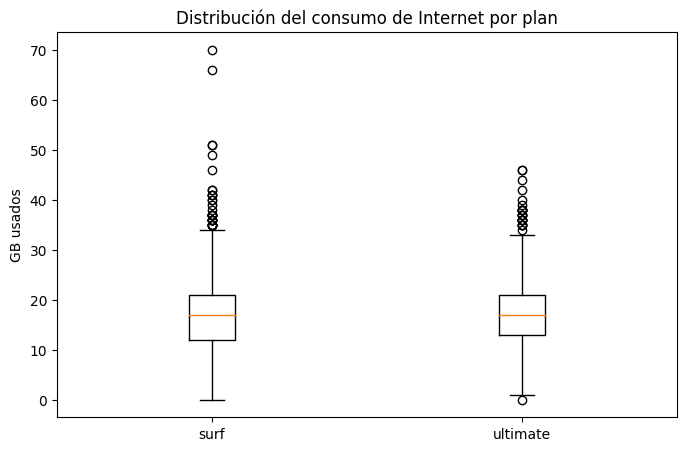

In [66]:
data = [
    df[df['plan'] == 'surf']['gb_used_total'].dropna(),
    df[df['plan'] == 'ultimate']['gb_used_total'].dropna()
]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=['surf', 'ultimate'])
plt.title('Distribución del consumo de Internet por plan')
plt.ylabel('GB usados')
plt.show()

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [72]:
plans = df.groupby('plan')['total']
revenue_stats = {
    'surf_mean': np.mean(plans.get_group('surf')),
    'surf_variance': np.var(plans.get_group('surf')),   # varianza muestral
    'ultimate_mean': np.mean(plans.get_group('ultimate')),
    'ultimate_variance': np.var(plans.get_group('ultimate'))
}

print(revenue_stats)

{'surf_mean': 60.706408137317226, 'surf_variance': 3065.8848438690247, 'ultimate_mean': 72.31388888888888, 'ultimate_variance': 129.66814043209877}


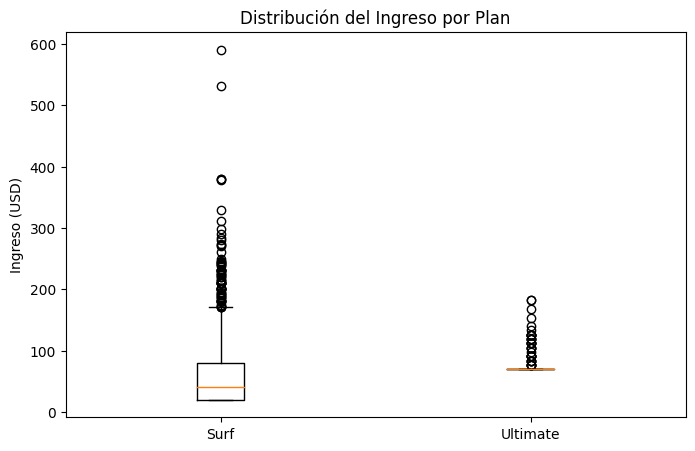

In [73]:
surf_revenue = df[df['plan'] == 'surf']['total']
ultimate_revenue = df[df['plan'] == 'ultimate']['total']

plt.figure(figsize=(8,5))
plt.boxplot([surf_revenue, ultimate_revenue], labels=['Surf', 'Ultimate'])
plt.title('Distribución del Ingreso por Plan')
plt.ylabel('Ingreso (USD)')
plt.show()

In [ ]:
#El plan ultimate tiene un ingreso promedio más alto y plan surf tiene un ingresio promeio inferior
#Respecto a la varianza surf tiene una varianza muy elevada de 3065, bis indica que hay quienes pagan grandes cantidades, evidenciado por los valores atipicos y los usuarios del plan ultimate tienen habitos de consumo más equilibrados

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

# Prueba las hipótesis

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [198]:


surf_revenue = df[df['plan'] == 'surf']['total'].dropna()
ultimate_revenue = df[df['plan'] == 'ultimate']['total'].dropna()
alpha = 0.05
results = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print("valor p:" , results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [199]:
# Prueba las hipótesis
ny_nj_users = users[users['city'].str.contains('NY|New York|Newark', case=False)]['user_id']

ny_nj = df[df['user_id'].isin(ny_nj_users)]['total'].dropna()
others = df[df['user_id'].isin(ny_nj_users) == False]['total'].dropna()

alpha = 0.05

results = stats.ttest_ind(ny_nj, others, equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.6097894513379762
No podemos rechazar la hipótesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

In [200]:
#El analisis de los datos nos muestra diferencias significativas, se confirma que el plan ultimate genera ingresos promedio superiores
#El redondeo hacia arriba de la duración de llamadas y el consumo de datos
#Conversion de MB a GB, para facilitar los calculos de excesos y agregar datos por usuario y mes, para crear un dataset
#El análisis del comportamiento de usuarios mostró que ambos planes tienen patrones de consumo similares en llamadas y mensajes, pero los usuarios de Ultimate tienden a mantenerse dentro de sus límites más generosos, mientras que los de Surf frecuentemente exceden los límites y pagan cargos adicionales, generando costos más elevados a un plan ultimate
#Los resultados de la primera Hipotesis muestran que sí existe una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate (p ≈ 3.17e-15), por lo que los usuarios generan ingresos distintos según el plan que utilizan.
#Sin embargo en la segunda hipotesis, no existe evidencia estadística de que los usuarios del área NY–NJ tengan ingresos promedio diferentes a los de otras regiones (p ≈ 0.61). En otras palabras, la ubicación geográfica no influye significativamente en los ingresos promedio, pero el tipo de plan sí lo hace.
#enfocar el presupuesto publicitario en el plan Ultimate, ya que no solo genera mayores ingresos promedio de manera consistente, sino que también ofrece mejor satisfacción al cliente al evitar cargos por excesos frecuentes.